# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

The Dataset: https://www.kaggle.com/datasets/sumitrodatta/nba-aba-baa-stats

Who:
The target audience for this dataset would most likely be NBA analysts, team executives, sports betting customers, and any sports data enthusiasts who are interested in understanding historical trends in player and team performance. This audience is familiar with basketball statistics and values data-driven insights to inform decisions, whether for player evaluations, strategy development, or historical comparisons. 

What:
The goal using this dataset is to highlight key trends in player performance and league evolution over time. Specifically, we can aim to analyze how scoring, assisting, and rebounding trends have changed across different eras, identifying how the depth in skills have shifted when influenced by rule changes, playing styles, or league expansions. The audience should walk away with a clear understanding of how past performance benchmarks compare to the performance of players in the NBA today.

How:
We can present our findings using interactive visualizations, including trend lines showing changes across decades, heat maps to compare player performances based on era, and specific studies of individual players who have brought a league-wide shift. This can be communicated through graphs and other visuals and a recorded presentation with interactive elements.

# 3. Homework - work with your own data

In [25]:
import pandas as pd
import numpy as np
import kagglehub
from datetime import datetime, timedelta

In [26]:
# Download latest version of NBA dataset
path = kagglehub.dataset_download("sumitrodatta/nba-aba-baa-stats")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Aydan Mufti\.cache\kagglehub\datasets\sumitrodatta\nba-aba-baa-stats\versions\42


In [27]:
file_path = path + "/Player Shooting.csv"
df = pd.read_csv(file_path)


This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

In [28]:
print("\n".join(df.columns))

seas_id
season
player_id
player
birth_year
pos
age
experience
lg
tm
g
mp
fg_percent
avg_dist_fga
percent_fga_from_x2p_range
percent_fga_from_x0_3_range
percent_fga_from_x3_10_range
percent_fga_from_x10_16_range
percent_fga_from_x16_3p_range
percent_fga_from_x3p_range
fg_percent_from_x2p_range
fg_percent_from_x0_3_range
fg_percent_from_x3_10_range
fg_percent_from_x10_16_range
fg_percent_from_x16_3p_range
fg_percent_from_x3p_range
percent_assisted_x2p_fg
percent_assisted_x3p_fg
percent_dunks_of_fga
num_of_dunks
percent_corner_3s_of_3pa
corner_3_point_percent
num_heaves_attempted
num_heaves_made


In [29]:
# 1. Summarize the dataset
print("Dataset Info:")
print(df.info())

print("\nDataset Description:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17334 entries, 0 to 17333
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   seas_id                        17334 non-null  int64  
 1   season                         17334 non-null  int64  
 2   player_id                      17334 non-null  int64  
 3   player                         17334 non-null  object 
 4   birth_year                     200 non-null    float64
 5   pos                            17334 non-null  object 
 6   age                            17334 non-null  int64  
 7   experience                     17334 non-null  int64  
 8   lg                             17334 non-null  object 
 9   tm                             17334 non-null  object 
 10  g                              17334 non-null  int64  
 11  mp                             17334 non-null  int64  
 12  fg_percent                     1

In [30]:
# 2. Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


In [31]:
# 3. Check for duplicate values in key columns
if 'player_id' in df.columns:
    duplicate_player_ids = df['player_id'].duplicated().sum()
    print(f"Number of duplicate player IDs: {duplicate_player_ids}")

if 'player' in df.columns:
    duplicate_players = df['player'].duplicated().sum()
    print(f"Number of duplicate player names: {duplicate_players}")

Number of duplicate player IDs: 14599
Number of duplicate player names: 14607


In [14]:
# 4. Compute mean, median, and mode for numerical columns
print("\nMean values:")
print(df.mean(numeric_only=True))


Mean values:
seas_id                          23752.500000
season                            2011.789893
player_id                         3719.304315
birth_year                        1979.425000
age                                 26.659859
experience                           5.615034
g                                   44.751413
mp                                1034.442137
fg_percent                           0.434508
avg_dist_fga                        12.583203
percent_fga_from_x2p_range           0.732560
percent_fga_from_x0_3_range          0.303522
percent_fga_from_x3_10_range         0.164249
percent_fga_from_x10_16_range        0.106225
percent_fga_from_x16_3p_range        0.158534
percent_fga_from_x3p_range           0.267445
fg_percent_from_x2p_range            0.470959
fg_percent_from_x0_3_range           0.608333
fg_percent_from_x3_10_range          0.365687
fg_percent_from_x10_16_range         0.356254
fg_percent_from_x16_3p_range         0.360921
fg_percent_from_x3p_

In [15]:
print("\nMedian values:")
print(df.median(numeric_only=True))


Median values:
seas_id                          23752.500
season                            2012.000
player_id                         3707.500
birth_year                        1980.000
age                                 26.000
experience                           5.000
g                                   47.000
mp                                 842.000
fg_percent                           0.436
avg_dist_fga                        13.100
percent_fga_from_x2p_range           0.739
percent_fga_from_x0_3_range          0.272
percent_fga_from_x3_10_range         0.143
percent_fga_from_x10_16_range        0.091
percent_fga_from_x16_3p_range        0.132
percent_fga_from_x3p_range           0.261
fg_percent_from_x2p_range            0.475
fg_percent_from_x0_3_range           0.617
fg_percent_from_x3_10_range          0.377
fg_percent_from_x10_16_range         0.369
fg_percent_from_x16_3p_range         0.379
fg_percent_from_x3p_range            0.330
percent_assisted_x2p_fg              0

In [16]:
print("\nMode values:")
print(df.mode().iloc[0])


Mode values:
seas_id                                  15086
season                                  2022.0
player_id                               3143.0
player                           Nazr Mohammed
birth_year                              1975.0
pos                                         SG
age                                       24.0
experience                                 1.0
lg                                         NBA
tm                                         TOT
g                                         82.0
mp                                         6.0
fg_percent                                 0.5
avg_dist_fga                              14.3
percent_fga_from_x2p_range                 1.0
percent_fga_from_x0_3_range                0.0
percent_fga_from_x3_10_range               0.0
percent_fga_from_x10_16_range              0.0
percent_fga_from_x16_3p_range              0.0
percent_fga_from_x3p_range                 0.0
fg_percent_from_x2p_range                  0.5

In [32]:
# 5. Check for missing/null values
missing_values = df.isnull().sum()
print("\nMissing values per column:")
print(missing_values)


Missing values per column:
seas_id                              0
season                               0
player_id                            0
player                               0
birth_year                       17134
pos                                  0
age                                  0
experience                           0
lg                                   0
tm                                   0
g                                    0
mp                                   0
fg_percent                         105
avg_dist_fga                       105
percent_fga_from_x2p_range         105
percent_fga_from_x0_3_range        105
percent_fga_from_x3_10_range       105
percent_fga_from_x10_16_range      105
percent_fga_from_x16_3p_range      105
percent_fga_from_x3p_range         105
fg_percent_from_x2p_range          191
fg_percent_from_x0_3_range         595
fg_percent_from_x3_10_range        928
fg_percent_from_x10_16_range      1409
fg_percent_from_x16_3p_range      16

In [33]:
# Handle missing values: Birth year has a high percentage of missing values, so we may need to drop the column
if 'birth_year' in df.columns and df['birth_year'].isnull().sum() / len(df) > 0.9:
    df.drop(columns=['birth_year'], inplace=True)
    print("\nDropped 'birth_year' due to excessive missing values.")

# Fill missing values for shooting percentages with column mean
shooting_percentage_cols = [col for col in df.columns if 'percent' in col]
df[shooting_percentage_cols] = df[shooting_percentage_cols].fillna(df[shooting_percentage_cols].mean())



Dropped 'birth_year' due to excessive missing values.


In [34]:
# 6. Identify inconsistent data
# Check if age is negative or unrealistically high
invalid_ages = df[(df['age'] < 15) | (df['age'] > 50)]
if not invalid_ages.empty:
    print("\nPossible inconsistent age values:")
    print(invalid_ages[['player', 'age']])

In [35]:
# 7. Encode categorical variables
categorical_cols = ['pos', 'lg', 'tm']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [36]:
# 8. Check for class imbalance (e.g., teams)
if 'tm' in df.columns:
    team_counts = df['tm'].value_counts()
    print("\nTeam distribution:")
    print(team_counts)

print("\nFinal cleaned dataset preview:")
print(df_encoded.head())


Team distribution:
tm
TOT    1641
TOR     556
PHI     554
CLE     554
DAL     553
HOU     545
MIL     532
PHO     531
ATL     530
WAS     528
LAC     527
DEN     526
NYK     522
MIA     522
BOS     521
SAC     520
ORL     519
DET     518
GSW     517
POR     512
SAS     512
LAL     512
CHI     510
IND     498
MIN     496
UTA     487
MEM     472
OKC     324
NJN     298
BRK     276
NOP     248
CHO     204
SEA     195
CHA     183
NOH     161
CHH     101
VAN      80
NOK      34
WSB      15
Name: count, dtype: int64

Final cleaned dataset preview:
   seas_id  season  player_id         player  age  experience   g   mp  \
0    31871    2025       5025     A.J. Green   25           3  39  844   
1    31872    2025       5026    A.J. Lawson   24           3   4   15   
2    31873    2025       5210     AJ Johnson   20           1   6   15   
3    31874    2025       4219   Aaron Gordon   29          11  27  717   
4    31875    2025       4582  Aaron Holiday   28           7  33  366   

   fg_

### Conclusions:

- Are the data usable?  If not, find some new data!
The data is usable

- Do you need to modify or correct the data in some way?
We did need to modify and correct the data - for example there were many missing values that we filled and we needed to drop the birth_year column entirely because more than 90% of the values were missing.
- Is there any class imbalance?  (Categories that have many more items than other categories).
- There are class imbalances as shown from the team distribution. 

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

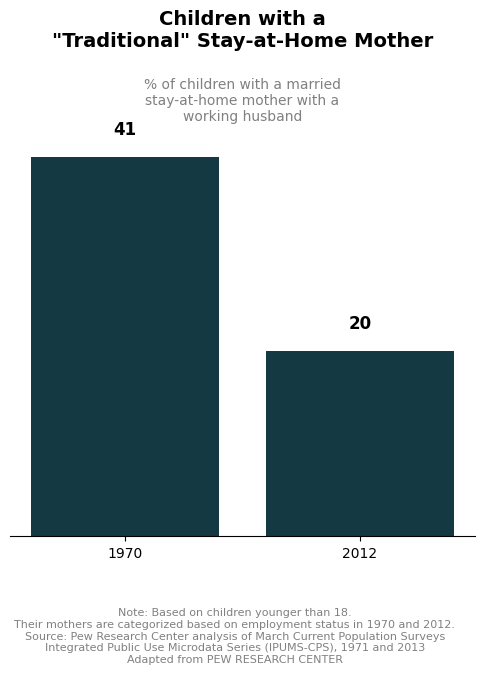

In [44]:
import matplotlib.pyplot as plt

# Data
years = ["1970", "2012"]
values = [41, 20]

# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 6))

# Creating the plot
bars = ax.bar(years, values, color="#153942")

# Add labels on top of bars
for bar, value in zip(bars, values):
    ax.text(bar.get_x() + bar.get_width() / 2, value + 2, str(value), 
            ha="center", va="bottom", fontsize=12, fontweight="bold", color="black")

ax.set_title("Children with a\n\"Traditional\" Stay-at-Home Mother", fontsize=14, fontweight="bold", color="black", pad=20)
ax.text(0.5, 45, "% of children with a married\nstay-at-home mother with a\nworking husband",
        fontsize=10, color="gray", ha="center")

# Adding space between the subtitle and the plot so it doesn't overlap
ax.set_ylim(0, 50)

# The model plot doesn't have a y-axis ticks or labels
ax.yaxis.set_visible(False)

# Remove borders
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

# Footnote
plt.figtext(0.5, -0.1, "Note: Based on children younger than 18.\nTheir mothers are categorized based on employment status in 1970 and 2012.\n"
             "Source: Pew Research Center analysis of March Current Population Surveys\n"
             "Integrated Public Use Microdata Series (IPUMS-CPS), 1971 and 2013\n"
             "Adapted from PEW RESEARCH CENTER",
             fontsize=8, color="gray", ha="center")

plt.show()


Image for reference:
![alt text](stay-at-home-moms-bar-graph.png)